## Library

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix

## Importing Models

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show


## Dataset

In [6]:
#train
df=pd.read_csv("Liver Patient Dataset (LPD)_train.csv",encoding= 'unicode_escape')
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [7]:
df.shape

(30691, 11)

In [8]:
df.dtypes

Age of the patient                      float64
Gender of the patient                    object
Total Bilirubin                         float64
Direct Bilirubin                        float64
 Alkphos Alkaline Phosphotase           float64
 Sgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
 ALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object

In [9]:
df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

## Data pre-processing

In [11]:
# --- Strip any extra whitespace from column names ---
df.columns = df.columns.str.strip()

In [12]:
# --- Removing Duplicate Rows ---
print(f"Original dataset shape: {df.shape}")
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

Original dataset shape: (30691, 11)
Dataset shape after removing duplicates: (19368, 11)


In [13]:
X = df.drop(columns = 'Result')
y = df['Result']

In [14]:
X.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
X.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio'],
      dtype='object')

In [17]:
df.isnull().sum()

Age of the patient                        1
Gender of the patient                   796
Total Bilirubin                         557
Direct Bilirubin                        490
Alkphos Alkaline Phosphotase            694
Sgpt Alamine Aminotransferase           459
Sgot Aspartate Aminotransferase         393
Total Protiens                          370
ALB Albumin                             413
A/G Ratio Albumin and Globulin Ratio    436
Result                                    0
dtype: int64

In [18]:
# --- For missing inputs ---
numerical_columns = ['Age of the patient','Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 
                     'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 
                     'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']
categorical_columns = ['Gender of the patient']

# Calculate median for numerical columns and mode for categorical columns from X_train
numerical_medians = X_train[numerical_columns].median()
categorical_modes = X_train[categorical_columns].mode().iloc[0]

# Apply imputation to X_train
X_train[numerical_columns] = X_train[numerical_columns].fillna(numerical_medians)
X_train[categorical_columns] = X_train[categorical_columns].fillna(categorical_modes)

# Apply the same imputation to X_test
X_test[numerical_columns] = X_test[numerical_columns].fillna(numerical_medians)
X_test[categorical_columns] = X_test[categorical_columns].fillna(categorical_modes)

In [19]:
X_train.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
dtype: int64

In [20]:
X_test.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
dtype: int64

In [21]:
X_train.shape

(15494, 10)

In [22]:
X_test.shape

(3874, 10)

In [23]:
X_train.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,15494.000000,15494.000000,15494.000000,15494.000000,15494.000000,15494.000000,15494.000000,15494.000000,15494.000000
mean,43.843811,3.250213,1.488234,287.404479,79.699303,110.024719,6.494746,3.139803,0.945536
std,16.432678,6.029442,2.828284,235.646355,178.795403,284.656494,1.073848,0.782654,0.319172
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,32.000000,0.800000,0.200000,178.000000,24.000000,26.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.920000
75%,55.000000,2.600000,1.300000,293.000000,60.000000,87.000000,7.200000,3.700000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [24]:
X_test.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000
mean,43.675013,3.244992,1.471477,283.013681,78.793495,106.875581,6.502736,3.141637,0.944380
std,16.543255,6.061655,2.855035,236.744740,180.382449,239.737077,1.102518,0.794994,0.315337
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000
50%,44.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.920000
75%,55.000000,2.400000,1.200000,290.000000,60.750000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [25]:
X_train.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
11154,68.0,Female,0.9,0.2,195.0,40.0,35.0,7.4,4.1,1.20
18501,30.0,Female,11.5,5.0,1050.0,99.0,187.0,6.2,2.8,0.80
4359,32.0,Male,2.2,0.8,209.0,25.0,20.0,8.0,4.0,1.00
14324,62.0,Male,2.7,1.3,219.0,60.0,180.0,7.0,3.2,0.80
4688,52.0,Male,0.9,0.2,194.0,52.0,45.0,6.0,3.9,1.85


In [26]:
X_test.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
12617,65.0,Male,0.6,0.1,137.0,22.0,16.0,4.9,1.9,0.60
3542,75.0,Male,1.0,0.3,208.0,17.0,15.0,7.0,3.6,1.00
20008,17.0,Male,1.0,0.2,194.0,32.0,36.0,7.5,3.6,0.92
11793,31.0,Male,1.4,0.8,178.0,13.0,26.0,8.0,4.6,1.30
4629,33.0,Male,11.1,6.1,214.0,60.0,186.0,6.9,2.8,2.80


In [27]:
pd.options.mode.copy_on_write = True
from sklearn.preprocessing import MinMaxScaler
scale_vars = ['Age of the patient','Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
              'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 
              'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']
scaler = MinMaxScaler()
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [28]:
X_train.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
11154,0.744186,Female,0.006702,0.005102,0.064485,0.015075,0.005082,0.681159,0.695652,0.36
18501,0.302326,Female,0.148794,0.250000,0.482169,0.044724,0.035983,0.507246,0.413043,0.20
4359,0.325581,Male,0.024129,0.035714,0.071324,0.007538,0.002033,0.768116,0.673913,0.28
14324,0.674419,Male,0.030831,0.061224,0.076209,0.025126,0.034560,0.623188,0.500000,0.20
4688,0.558140,Male,0.006702,0.005102,0.063996,0.021106,0.007115,0.478261,0.652174,0.62


In [29]:
X_test.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
12617,0.709302,Male,0.002681,0.000000,0.036150,0.006030,0.001220,0.318841,0.217391,0.120
3542,0.825581,Male,0.008043,0.010204,0.070835,0.003518,0.001016,0.623188,0.586957,0.280
20008,0.151163,Male,0.008043,0.005102,0.063996,0.011055,0.005286,0.695652,0.586957,0.248
11793,0.313953,Male,0.013405,0.035714,0.056180,0.001508,0.003253,0.768116,0.804348,0.400
4629,0.337209,Male,0.143432,0.306122,0.073766,0.025126,0.035780,0.608696,0.413043,1.000


### Feature Selection with Pearson's correlation

In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode Gender column in both training and testing datasets
X_train['Gender of the patient'] = label_encoder.fit_transform(X_train['Gender of the patient'])
X_test['Gender of the patient'] = label_encoder.transform(X_test['Gender of the patient'])

In [32]:
corr = X_train.corr()
corr

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
Age of the patient,1.000000,0.025214,-0.007063,-0.007504,0.001708,0.000780,0.001166,-0.007193,-0.008577,-0.008444
Gender of the patient,0.025214,1.000000,0.011846,0.010020,0.000907,0.014392,0.007196,0.012223,0.014299,0.009541
Total Bilirubin,-0.007063,0.011846,1.000000,0.879015,0.202994,0.211236,0.239604,-0.000139,-0.211366,-0.181264
Direct Bilirubin,-0.007504,0.010020,0.879015,1.000000,0.222038,0.223636,0.252059,0.002464,-0.217918,-0.171788
Alkphos Alkaline Phosphotase,0.001708,0.000907,0.202994,0.222038,1.000000,0.130228,0.166550,-0.022190,-0.161954,-0.227205
Sgpt Alamine Aminotransferase,0.000780,0.014392,0.211236,0.223636,0.130228,1.000000,0.756461,-0.037677,-0.028055,-0.007104
Sgot Aspartate Aminotransferase,0.001166,0.007196,0.239604,0.252059,0.166550,0.756461,1.000000,-0.024992,-0.084361,-0.068661
Total Protiens,-0.007193,0.012223,-0.000139,0.002464,-0.022190,-0.037677,-0.024992,1.000000,0.767708,0.220820
ALB Albumin,-0.008577,0.014299,-0.211366,-0.217918,-0.161954,-0.028055,-0.084361,0.767708,1.000000,0.669486
A/G Ratio Albumin and Globulin Ratio,-0.008444,0.009541,-0.181264,-0.171788,-0.227205,-0.007104,-0.068661,0.220820,0.669486,1.000000


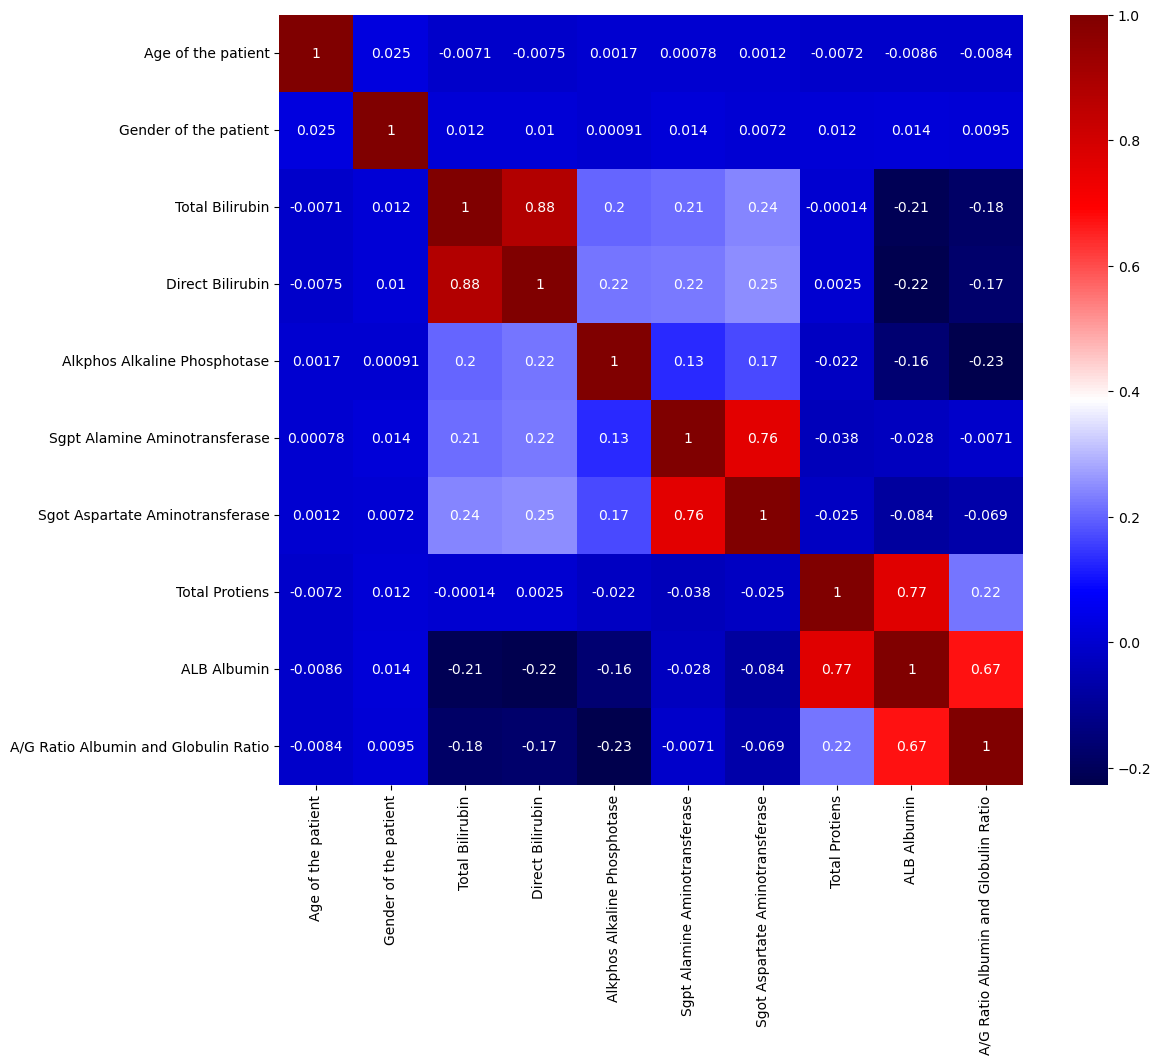

In [33]:
# Heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");

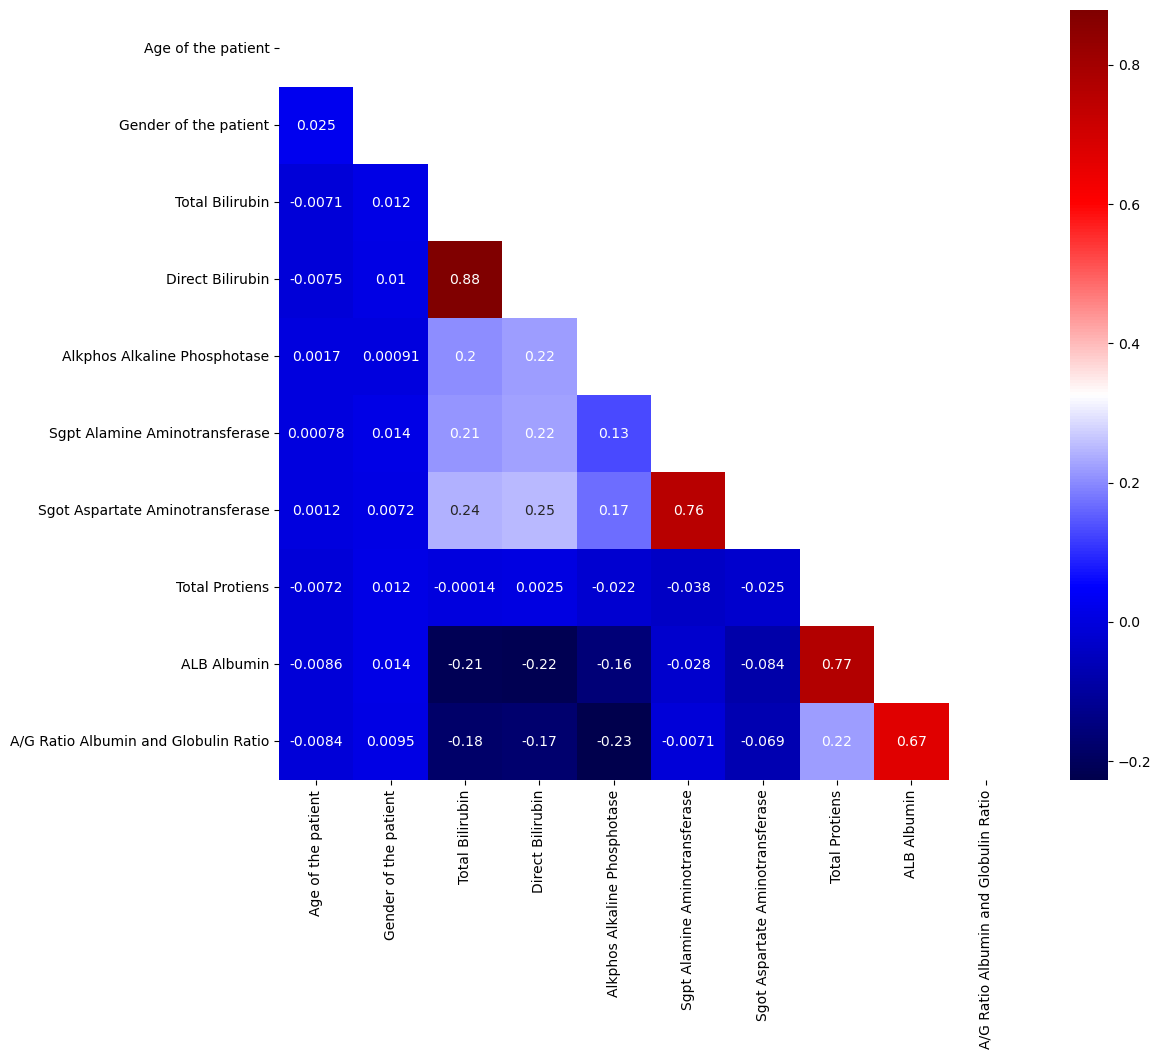

In [34]:
# use of the mask 
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [35]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [36]:
corr_features = correlation(X_train, 0.85) 
print(len(corr_features))
print(corr_features)

1
{'Direct Bilirubin'}


In [37]:
X_train = X_train.drop(columns=corr_features)
X_test = X_test.drop(columns=corr_features)

In [38]:
X_train.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
11154,0.744186,0,0.006702,0.064485,0.015075,0.005082,0.681159,0.695652,0.36
18501,0.302326,0,0.148794,0.482169,0.044724,0.035983,0.507246,0.413043,0.20
4359,0.325581,1,0.024129,0.071324,0.007538,0.002033,0.768116,0.673913,0.28
14324,0.674419,1,0.030831,0.076209,0.025126,0.034560,0.623188,0.500000,0.20
4688,0.558140,1,0.006702,0.063996,0.021106,0.007115,0.478261,0.652174,0.62


In [39]:
X_test.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
12617,0.709302,1,0.002681,0.036150,0.006030,0.001220,0.318841,0.217391,0.120
3542,0.825581,1,0.008043,0.070835,0.003518,0.001016,0.623188,0.586957,0.280
20008,0.151163,1,0.008043,0.063996,0.011055,0.005286,0.695652,0.586957,0.248
11793,0.313953,1,0.013405,0.056180,0.001508,0.003253,0.768116,0.804348,0.400
4629,0.337209,1,0.143432,0.073766,0.025126,0.035780,0.608696,0.413043,1.000


## Training

In [41]:
# List of models to train and test
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "k-Nearest Neighbors (k-NN)": KNeighborsClassifier(),
    "Support Vector Machines (SVM)": SVC(probability=True, random_state=42),
    "Gradient Boosting Machines (GBM)": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42), 
    "Explainable Boosting Machine (EBM)" : ExplainableBoostingClassifier(random_state=42)
}

In [42]:
# Initialize a dictionary to store results
results = []

In [43]:
# Remap labels to [0, 1] for binary classification (if needed)
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

for name, model in models.items():
    print(f"Training {name}...")
    # Train the model
    model.fit(X_train, y_train_mapped)  # Use mapped labels for binary classification
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics with zero_division=0 for handling any division by zero
    train_accuracy = accuracy_score(y_train_mapped, y_train_pred)
    test_accuracy = accuracy_score(y_test_mapped, y_test_pred)
    
    conf_matrix = confusion_matrix(y_test_mapped, y_test_pred)
    class_report = classification_report(y_test_mapped, y_test_pred, zero_division=0)

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    })



Training Decision Tree...
Training Random Forest...
Training k-Nearest Neighbors (k-NN)...
Training Support Vector Machines (SVM)...
Training Gradient Boosting Machines (GBM)...
Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4438, number of negative: 11056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Number of data points in the train set: 15494, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286433 -> initscore=-0.912769
[LightGBM] [Info] Start training from score -0.912769
Training CatBoost...
Training Explainable Boosting Machine (EBM)...


In [44]:
# Display the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Train Accuracy: {result['Train Accuracy']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print("-" * 80)



Model: Decision Tree
Train Accuracy: 0.9999
Test Accuracy: 0.9884
Confusion Matrix:
[[2729   26]
 [  19 1100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2755
           1       0.98      0.98      0.98      1119

    accuracy                           0.99      3874
   macro avg       0.98      0.99      0.99      3874
weighted avg       0.99      0.99      0.99      3874

--------------------------------------------------------------------------------
Model: Random Forest
Train Accuracy: 0.9999
Test Accuracy: 0.9935
Confusion Matrix:
[[2742   13]
 [  12 1107]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2755
           1       0.99      0.99      0.99      1119

    accuracy                           0.99      3874
   macro avg       0.99      0.99      0.99      3874
weighted avg       0.99      0.99      0.99      387

## Hyper Parametere Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grids for each model
param_grids = {
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30, 40],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300, 500],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "k-Nearest Neighbors (k-NN)": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Support Vector Machines (SVM)": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "gamma": ["scale", "auto"]
    },
    "Gradient Boosting Machines (GBM)": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "subsample": [0.6, 0.8, 1.0]
    },
    "LightGBM": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [-1, 10, 20],
        "num_leaves": [31, 50, 100]
    },
    "CatBoost": {
        "iterations": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "depth": [3, 6, 10]
    },
    "Explainable Boosting Machine (EBM)": {
        'max_bins': [128, 256, 512],
        'max_interaction_bins': [16, 32, 64],
        'interactions': [0, 5, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'min_samples_leaf': [1, 2, 4],
        'max_leaves': [3, 5, 10]
    }
}

In [47]:
# Initialize a dictionary to store results
tuned_results = []

# Loop through models and perform hyperparameter tuning
for name, model in models.items():
    print(f"Tuning {name}...")
    param_grid = param_grids[name]
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=10,  # Number of parameter combinations to try
        scoring="accuracy",
        cv=5,  # 5-fold cross-validation
        random_state=42,
        verbose=1,
        n_jobs=-1  # Use all available cores
    )
    search.fit(X_train, y_train_mapped)  # Fit search on training data

    # Use the best estimator for predictions
    best_model = search.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Metrics with zero_division=0 for handling any division by zero
    train_accuracy = accuracy_score(y_train_mapped, y_train_pred)
    test_accuracy = accuracy_score(y_test_mapped, y_test_pred)

    conf_matrix = confusion_matrix(y_test_mapped, y_test_pred)
    class_report = classification_report(y_test_mapped, y_test_pred, zero_division=0)

    # Store results
    tuned_results.append({
        "Model": name,
        "Best Parameters": search.best_params_,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    })


Tuning Decision Tree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning k-Nearest Neighbors (k-NN)...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning Support Vector Machines (SVM)...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning Gradient Boosting Machines (GBM)...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning LightGBM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4438, number of negative: 11056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 920
[LightGBM] [Info] Numbe

In [48]:
# Display results
for result in tuned_results:
    print(f"\nModel: {result['Model']}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Train Accuracy: {result['Train Accuracy']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])


Model: Decision Tree
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Train Accuracy: 0.9999
Test Accuracy: 0.9884
Confusion Matrix:
[[2729   26]
 [  19 1100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2755
           1       0.98      0.98      0.98      1119

    accuracy                           0.99      3874
   macro avg       0.98      0.99      0.99      3874
weighted avg       0.99      0.99      0.99      3874


Model: Random Forest
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Train Accuracy: 0.9997
Test Accuracy: 0.9946
Confusion Matrix:
[[2746    9]
 [  12 1107]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2755
           1       0.99      0.99      0.99      1119

    accuracy                  